# Uso de algoritmos genéticos para el estudio de espacio de parámetros en materia oscura. 
## Por: Gustavo A. Castrillón. 

# Algoritmos genéticos. 

En general, estas técnicas de computación son algoritmos que se centran en recrear los principios darwinianos para la resolución automatizada de problemas. Como se menciona en \cite{deasurvey} la computación evolutiva utiliza el progreso iterativo, como crecimiento o desarrollo de una población. Esta población es seleccionada por medio de una búsqueda aleatoria (o algoritmos de Monte Carlo) guiada por un procesamiento paralelo para lograr obtener algo en particular. 

La evolución diferencial (en inglés differential evolution DE) es un algoritmo evolutivo simple, pero potente para la optimización global y fue introducido por Price y Storn \cite{prince_y_storn}. Estos tienen una ventaja sobre otros tipos de métodos numéricos. Y es por el hecho de que sólo requieren una función objetivo, además de que no se necesita que la función sea continua o diferenciable, lo que ayuda a estudiar fenómenos que son desconocidos en primera instancia.

Como se describe en \cite{sastudy} el algoritmo comienza con una serie de soluciones supuestas, la rutina multipunto actualiza una o más soluciones de manera sinérgica con la esperanza de dirigir a la población hacia el óptimo. Los valores adecuados para estudiar el espacio de parámetros, es a medida, dependiente del problema y requiere en ocasiones un conocimiento previo del mismo, o al menos en su medida en conocer los posibles rangos necesarios para entender el fenómeno. 

Existen diferentes variantes relacionadas a los algoritmos genéticos. En este trabajo se usó el DE que está en la librería de Scipy en Python \cite{depython}. 

A esta función se le pasa diferentes tipos de parámetros para poder trabajar, los cuales son: función, ligaduras, argumentos, estrategia, tamaño de la población, tolerancia, índice de mutación, recombinación y semilla. Puede haber otros parámetros de la rutina pero no son de interés tratarlos aquí. 

#### Función: 
La función es el objeto matemático o físico que deseamos estudiar en nuestro sistema. Independiente del tipo de función, esta estará compuesta por de la siguiente forma: $f(x; \theta_{1},\text{...} \theta_{n}, \sigma_{1}, \text{…}, \sigma_{n})$. Donde $x$ son los valores variables. $\theta_{1}$, …, $\theta_{n}$, los parámetros de estudio del sistema y $\sigma_{1}$, … , $\sigma_{n}$ los parámetros libres.  

#### Ligaduras:
En ligaduras se debe ingresar el rango de valores respectivos para cada parámetro de estudio, esto es lo que delimitará el problema. Por ejemplo, si unos de los parámetros de estudio es la masa de una partícula de materia oscura, se puede establecer el bounds o ligadura dentro de los rangos de $10$ GeV y $10$ TeV.

#### Estrategia:
Este consiste en usar un método en específico para generar las mutaciones del modelo, estas son construidas. En el algoritmo de scipy, están presentes diferentes tipos de métodos, los cuales son: 

|Estrategias| | |
|-------|--------|------|
|best1bin|best1exp|rand1exp|
|randtobest1exp|currenttobest1exp|best2exp|
|rand2exp|randtobest1bin|currenttobest1bin|
|best2bin|rand2bin|rand1bin|

En el blog \cite{blog_pablo}, se explica que cuando una estrategia se inicia con ''(rand)'', implica la generación de dos vectores aleatorios de la población y su posterior mezcla mediante dos tipos de cruzamientos. La estrategia ''(bin)'' se basa en un enfoque binomial, donde se introduce una probabilidad "p" para determinar cuál gen será heredado por el hijo de los dos vectores seleccionados. En otras palabras, existe una probabilidad ''p'' de adquirir una característica del primer padre y una probabilidad de ''1-p'' de adquirir una característica del segundo padre.

Por otro lado, la estrategia ''(exp)'' es de tipo exponencial, donde se eligen de manera aleatoria dos posiciones en un vector del padre. Luego, se extraen todos los valores numéricos consecutivos ubicados entre esas dos posiciones en cada uno de los vectores padre. Estos dos nuevos vectores generados son posteriormente combinados para introducir una nueva mutación en el nuevo elemento de la población.

Podemos inferir que las otras estrategias siguen un patrón similar en su nomenclatura. Por ejemplo, ''(best)'' implica que se seleccionan los padres de los vectores considerados los mejores en términos de alguna métrica o criterio. Así mismo, ''(randtobest)'' sugiere que se toman dos padres de forma aleatoria del conjunto de los mejores vectores.

En resumen, estas estrategias se distinguen principalmente por su enfoque en la selección de padres para la generación de nuevos vectores durante el proceso de optimización. La elección de una estrategia específica depende de la experiencia y del objetivo de optimización.

En la práctica, es común emplear múltiples estrategias de manera simultánea para realizar un estudio exhaustivo del espacio de parámetros y obtener resultados más completos.

#### Tamaño de la población:
Cada vez que el algoritmo se ejecuta, crea un conjunto de posibles valores que representan soluciones para la función o modelo en cuestión, conocido como población. Esta población puede consistir en 25, 50, 100 vectores, que son evaluados y seleccionados por diversas estrategias del algoritmo para generar una nueva población y determinar las soluciones más efectivas. El tiempo que lleva el algoritmo en converger también depende del tamaño de la población; generalmente, una población más grande aumenta el tiempo de ejecución pero tiende a converger hacia una solución óptima.

#### Tolerancia:
Según la literatura de scipy, la tolerancia es el parámetro que define cuán cerca debe estar la función o el modelo de una solución óptima antes de que el algoritmo se considere convergido y se detenga.

#### Índice de mutación:
También conocido como peso diferencial, este parámetro se encuentra en el rango de [0, 2]. En cada iteración, el algoritmo genera un valor aleatorio dentro de este rango, el cual representa la probabilidad de realizar una mutación en esa iteración.

#### Recombinación:
Este valor, en el rango de [0, 1], indica la probabilidad de cruce entre diferentes individuos de la población.

#### Semilla:
La semilla es un valor utilizado para inicializar la generación de números aleatorios. Es útil cuando se busca que un experimento u optimización sea reproducible, lo que significa que los resultados sean consistentes cada vez que se ejecute el algoritmo con la misma semilla.

In [1]:
from scipy.optimize import differential_evolution #Se usa para importar el algoritmo genético de la libreria.
# Normalmente se usa la siguiente función. 
''' differential_evolution(objective, bounds,
                           strategy='best1bin', maxiter=None,
                           popsize=100, tol=0.01, mutation=(1.5, 1.999), recombination=0.9,
                           polish=False, seed=seed)'''
print("")

# Uso de DE para estudiar la función de Rosenbrock

Es en \cite{sasy} donde se trata el uso de algoritmos genéticos para estudiar el espacio de parámetros de una función, en particular la función de Rosenbrock. Esta última, es la más usada para estudiar algoritmos, debido a que requiere grandes esfuerzos para producir buenos resultados.

Para estudiar esta función debemos plantear un objeto matemático conocido como ''function likelihood'' o también llamado función de verosimilitud, en español. Este es un elemento fundamental en estadística y probabilidad y se encarga de cuantificar qué tan bien se ajustan los parámetros de un modelo a los datos observados.  

En el artículo mencionado anteriormente, se considera la función de Rosenbrock como el likelihood, de la forma: 

\begin{equation}
L = \exp(-f(a, b)) \quad \text{con } f(a, b) = (1 - a)^2 + 100(b - a^2)^2
\end{equation}


Pero la ecuación matemática que debe ser ingresada al DE, consiste en $-2lnL$, el cual está relacionado por medio de un teorema de milk’s con el valor de chi cuadrado ($\chi^{2}$), este valor es el que permite determinar que tan viable es una solución y poder proceder en escoger una convergencia. 
Es así que tenemos: 

\begin{equation}
-2 Ln L(x) = 2\sum^{3}_{i=1} f(x_i,x_{i+1})  
\end{equation}

y el algoritmo de DE nos arrojará un conjunto de vectores con cuatro componentes $x_1$, $x_2$, $x_3$ y $x_4$ las cuales corresponden a la soluciones estimadas para la función de Rosenbrock. 


Originalmente, DE genera un único vector, el cual de acuerdo a lo descrito anteriormente, es dado cuando el algoritmo converge y en teoría es la solución más óptima al problema. Es posible modificar el algoritmo para no generar un (1) solo vector, sino un conjunto de vectores como posibles soluciones al problema y analizar a partir de la estadística este conjunto, el método se encuentra en el artículo\cite{sasy}. 

In [2]:
#Es necesario importas varias librerias. 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import chi2 #Se usa para analizar que tan acertada es la solución al valor actual. 
import pandas as pd #Para administrar los archivos.

In [3]:
import matplotlib as mpl
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4

#mpl.rcParams['xtick.labelsize'] = 50
mpl.rc('text', usetex=True)
#mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

In [4]:
# Color style for output sample points
de_pts = "#91bfdb" # Diver scan
rn_pts = "#fc8d59" # Random scan
gd_pts = "#ffffbf" # Grid scan

In [5]:
#Se debe imponer al sistema unas ligaduras o bounds. 
#Para este caso se considera el rango de estudio para las cuatro componentes que este entre -4 y 4.
min_ = -4 
max_ = 4 

seed = 127 #Se establece una semilla para replicar los valores. 
dim = 4 #La cantidad de parámetros que vamos a usar. 
bounds = [(min_,max_)]*dim #Se generan 4 ligaduras, para las 4 variables que deseamos estudiar.

# Confidence level etc
alpha = 0.05
beta = 1. - alpha
critical_chi_sq = chi2.isf(alpha, 2)
critical_loglike = 0.5 * critical_chi_sq
min_chi_sq = 0.

In [6]:
def rosenbrock(x, y): #Construcción de la función de Rosenbrock
    """
    @returns Rosenbrock function
    """
    a = 1.
    b = 100.
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_general(x):
    """
    @returns Generalization of Rosenbrock function
    """
    n = len(x)
    return sum(rosenbrock(x[i], x[i+1]) for i in range(n - 1))

def loglike(x): #Función chi^{2} construida a partir de la función de Rosenbrock. 
    """
    @returns Log-likelihood
    """
    return -rosenbrock_general(x) 

def analytic_4d(level):
    """
    @returns Analytic result for contour
    """
    y = np.linspace(-0.25, 1.75, 100000)
    x = [analytic_x_4d(y_, level) for y_ in y]
    x1, x2 = zip(*x)
    return (x1, x2, y)

def analytic_x_4d(y, level):
    """
    @returns Analytic solutions for x as function of y on contour

    Trivial to solve for x_3 and x_4. Solutions for x_1 as function of x_2 are
    solutions to a quartic.
    """
    coeffs = np.array([100.,
                       0.,
                       1. - 200. * y,
                       -2., (y * (100. * y**3 + 10001. * y - 202.) + 302.) / 101.])
    coeffs[-1] -= level
    roots = np.roots(coeffs)
    real_roots = roots[np.isclose(roots.imag, 0.)].real
    real_roots.sort()

    if len(real_roots) != 2:
        return [None, None]

    return real_roots

In [7]:
def de_scan():
    x = [] 
    chi_sq = [] 
    datos = [] 
    '''
    @El truco para obtener todo el espacio generado consiste en ir almacenando la informacion en vectores externos 
    conforme el algoritmo se va ejecutando, como se puede ver en datos.append(vector). 
    '''
    
    def objective(x_): 
        vector =[0]*4 #Crea un vector que me almacena la información de los 4 parámetros y el valor de chi^{2}
        chi_sq_ = -2. * loglike(x_) #Arroja el valor del espacio de parámetros.
        #x_ corresponde a los valores del espacio de parametros.
        vector[0:3] = x_ 
        vector[4] = chi_sq_
        datos.append(vector)
        '''
        @La función objetivo debe retornar el valor de chi cuadrado para que el algoritmo funcione correctamente. 
        '''
        return chi_sq_
    
    
    differential_evolution(objective, bounds,
                           strategy='rand1bin', maxiter=None,
                           popsize=50, tol=0.01, mutation=(0.7, 1.99999), recombination=0.15,
                           polish=False, seed=seed)
    
    
    return datos

In [8]:
informacion = de_scan()

In [9]:
nombres = ['x1','x2','x3','x4','loglike']
df = pd.DataFrame(informacion, columns=nombres)
df.head()

,x1,x2,x3,x4,loglike
0,1.405382,0.924702,-1.294378,-3.695988,6925.959262
1,-1.488384,-2.209532,3.043470,-0.258514,22763.935629
2,0.330829,3.768196,-1.267092,-3.671906,56115.903020
3,2.366118,0.422145,-2.059134,-0.092083,10136.667633
4,3.599148,1.792059,-3.053039,-0.749418,53096.492596


Este archivo df posee todos los valores calculados por el espacio de parámetros, para poder examinar los valores que corresponden a la solución del problema es necesario establecer una mascara para límitar los valores que deseo estudiar, esto debe realizarse de la siguiente manera.

In [10]:
Lmax=min(df['loglike'])
print("El valor minimo de chi cuadrado calculado es: ", Lmax)

El valor minimo de chi cuadrado calculado es:  0.023616147623598323


In [11]:
'''
@Aca lo que hacemos es restarle todos los valores por el minímo 
valor de chi cuadrado, esto con la intención de construir un 
profile. 
@Estos valores se establecen a 2 sigma y a 1 sigma. 
'''
data2 = df[(df['loglike'] - Lmax) < 5.99] ##2Sigma
data1 = df[(df['loglike'] - Lmax) < 2.30] ##2Sigma

data1.head()

,x1,x2,x3,x4,loglike
6983,0.863538,0.775975,0.549281,0.313785,1.315191
9858,0.962262,1.013642,1.043310,1.063350,1.721614
10966,0.884997,0.791259,0.692978,0.530616,1.717813
14922,1.061760,1.135952,1.223581,1.559730,1.835238
15026,1.021705,0.974505,0.931509,0.852570,1.085960


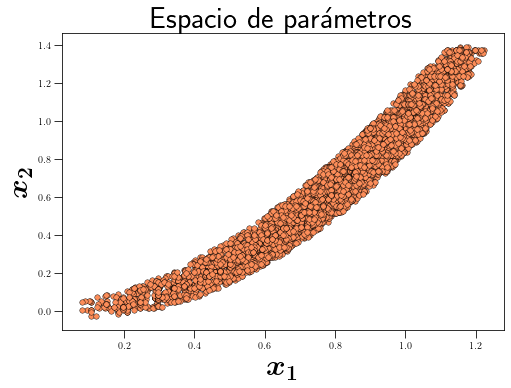

In [12]:
plt.figure(figsize=(7.2,5.5))
plt.scatter(data2['x1'], data2['x2'], s=30, edgecolor='0.0',
                linewidth=0.40, alpha=1.0, facecolor=rn_pts,
                label=r'Differential evolution: \num{{{:d}}} out of \num{{{:d}}} points')
plt.title(r'Espacio de parámetros',size=30,)
plt.xlabel(r'$\boldsymbol{x_{1}}$',size=30)
plt.ylabel(r'$\boldsymbol{x_{2}}$',size=30)
plt.tight_layout()

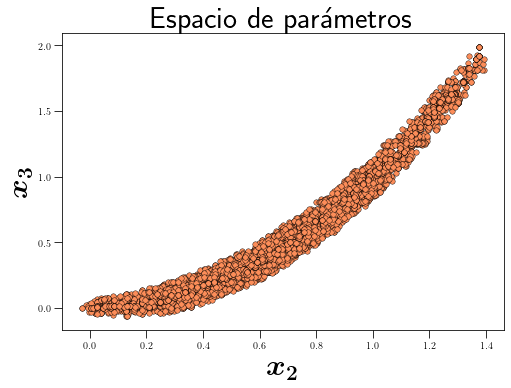

In [13]:
plt.figure(figsize=(7.2,5.5))
plt.scatter(data2['x2'], data2['x3'], s=30, edgecolor='0.0',
                linewidth=0.40, alpha=1.0, facecolor=rn_pts,
                label=r'Differential evolution: \num{{{:d}}} out of \num{{{:d}}} points')
plt.title(r'Espacio de parámetros',size=30,)
plt.xlabel(r'$\boldsymbol{x_{2}}$',size=30)
plt.ylabel(r'$\boldsymbol{x_{3}}$',size=30)
plt.tight_layout()

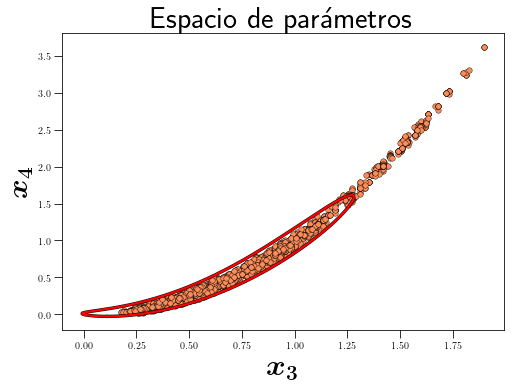

In [14]:
plt.figure(figsize=(7.2,5.5))
plt.scatter(data1['x3'], data1['x4'], s=30, edgecolor='0.0',
                linewidth=0.40, alpha=1.0, facecolor=rn_pts,
                label=r'Differential evolution: \num{{{:d}}} out of \num{{{:d}}} points')
plt.title(r'Espacio de parámetros',size=30,)
plt.xlabel(r'$\boldsymbol{x_{3}}$',size=30)
plt.ylabel(r'$\boldsymbol{x_{4}}$',size=30)
plt.tight_layout()
x1, x2, y = analytic_4d(critical_loglike)

plt.plot(x1, y, c="0.05", lw=3.3)
plt.plot(x2, y, c="0.05", lw=3.3)
plt.plot(x1, y, c="red", lw=2.2)
plt.plot(x2, y, c="red", lw=2.2,
             label=r"${0:.0f}\%$ confidence level contour".format(100. * beta))


# Modelo Z2. 

El modelo más básico de materia oscura es el conocido como singlete escalar (scalar singlet) o escenario del ''portal de Higgs escalar'' (higgs-portal), este se encarga de extender el modelo estándar con un campo escalar $S$ no cargado bajo la simetría del modelo estándar, imponiendo sobre el sistema que, el nuevo campo posea una simetría discreta $Z_{2}$ generando así una cantidad conservada similar a la paridad.   

## Lagrangiano del modelo. 

Considere el caso de un singlete real escalar $S$. Este escalar se vuelve estable cuando se posee un lagrangiano invariante bajo una simetría $Z_{2}$. Como se plantea en \cite{impact_of_vaccum} el lagrangiano tendrá la forma: 

$$  \mathcal{L} = \mathcal{L}_{SM} + \frac{1}{2} \partial_{\mu} S \partial^{\mu} S + \frac{\mu_{s}}{2} S^{2} + \frac{\lambda_{s}}{4} S^{4} + \frac{1}{2}\lambda_{SH} S^{2} H^{2} $$

Como se menciona en \cite{so} el término $\mu_{s}$ que acompaña a $S^{2}$ es conocido con el término de "bare masses", esto refiere a masas intrínsecas o en reposo de la partícula. Es debido a la interacción con otros campos, como por ejemplo, el campo de Higgs que por medio de su mecanismo o el rompimiento de la simetría que se adquiere correcciones a esta bare mass y cambian las propiedades másicas de las partículas. Otro parámetro es el que acompaña a $S^{4}$, o sea $\lambda_{s}$ este se refiere a un término de interacción o de fuerza entre la partícula escalar de materia oscura. Por último, se tiene el parámetro que relaciona a la partícula de materia oscura con el bosón H, este es $\lambda_{SH}$, este consiste en un término de fuerza que nos indica un posible decaimiento de un Higgs a dos partículas de materia oscura.

Deseamos analizar el comportamiento de las partículas cuando ocurre el rompimiento de la simetría, esto ya que la materia oscura debe tener presente una masa. Para esto, es necesario perturbar el campo de Higgs alrededor de su valor esperado de vacío. Considérese el bosón $H$ escrito de la forma $H = (h + \nu_0) / \sqrt{2}$ siendo $\nu_{0}$ el valor esperado de vacío. Cuando reemplazamos esta forma en el lagrangiano, y realizando algunos procedimientos algebráicos llegamos a la forma: 


\begin{equation}
    \mathcal{L} = \mathcal{L}_{SM} + \frac{1}{2} \partial_{\mu} S \partial^{\mu} S + \frac{1}{2}(\mu_{S} + \lambda_{SH}\nu_{0}^{2}) S^{2} + \frac{\lambda_{s}}{4} S^{4} + \nu_{0}\lambda_{SH}S^{2}h + \frac{1}{2}\lambda_{SH} S^{2} h^{2}
\end{equation}

Es posible observar a simple vista que el nuevo lagrangiano aun posee la simetría $Z_{2}$. Por otro lado, se adquiere una materia oscura con masa, que depende del cuadrado del valor esperado del vacío y de la constante de interacción entre materia oscura y Higgs $\lambda_{SH}$. También se genera un nuevo término relacionado a una interacción $S^{2}h$  cuyo parámetro de interacción está dado por $\nu_{0}\lambda_{SH}$, mientras que aún se tiene presente la interacción original $S^{2}h^{2}$ con parámetro $\frac{\lambda}{2}$. 

## Densidad reliquia.

Cuando se habla de la densidad reliquia para la materia oscura, nos referimos a la densidad de partículas presentes en el universo actualmente. Según los datos medidos por el laboratorio Planck la densidad reliquia para la materia oscura actualmente ronda el valor de $0.120 \pm 0.01$ \cite{planck}.

Ahora, para calcular la densidad reliquia de $S$, es necesario resolver la ecuación de Boltzmann, dada por\cite{gondolo}:  

\begin{equation}
    \frac{d n_{s}}{dt} + 3Hn_{s} = - <\sigma v_{rel}> (n_{s}^{2} - n_{s,eq}^{2} ) \label{eq:densidad}
\end{equation}

siendo $n_{s}$ la densidad numérica de materia oscura, $n_{s,eq}$ es la densidad numérica si la población de materia oscura estuviera en equilibrio químico con el resto del universo, $H$ es la tasa de Hubble y $<\sigma v_{rel}>$ es el promedio térmico. 

La ecuación \eqref{eq:densidad} es una ecuación diferencial que nos describe cómo cambia la densidad numérica de partículas. Como imposición a está se supuso un desacoplamiento cińetico de las partículas de DM antes del freeze-out. 

En el modelo, podrán ocurrir procesos donde el canal de decaimiento permite que un bosón de Higgs decaiga en partículas de materia oscura, normalmente ocurriría un decaimiento en reposo cuando $M_{S} \leq M_{H}/2$.

Es a partir de diferentes procesos algebráicos como los realizados en que es posible calcular determinar una fórmula para calcular esta tasa de decaimiento que es conocida como el ancho de Higgs invisible, y está dado por la ecuación \cite{so}: 

\begin{equation}
\Gamma_{H->SS} = \frac{\lambda_{SH}^{2} \nu_{0}^{2}}{32\pi M_{H}} (1 - 4M_{S}^{2} / M_{H}^{2})^{1 / 2} \label{eq:ancho_decaimiento}
\end{equation}

La ecuación \eqref{eq:ancho_decaimiento} hace que exista una zona particular del modelo, en esta, el bosón de Higgs decae en materia oscura. En los laboratorios, sería posible medir esta tasa de decaimiento invisible, aquí se presentaría un fenómeno similar de cuando se descubrió el decaimiento $\beta$, pero de todos los bosones H creados en el colisionador, un porcentaje decaería en partículas “invisibles”, en nuestro caso materia oscura, además de que este decaimientos también debería influir en la densidad reliquia.  

In [15]:
#Es necesario importas varias librerias. 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import chi2 #Se usa para analizar que tan acertada es la solución al valor actual. 
import pandas as pd #Para administrar los archivos.
import subprocess #Para ejecutar comandos
import time #Para mostrar los tiempos del proceso
from scipy.optimize import differential_evolution #Llamamos al algoritmo genético.

In [16]:
print(plt.style.available)
plt.style.use('classic')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [17]:
import matplotlib as mpl
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4

#mpl.rcParams['xtick.labelsize'] = 50
mpl.rc('text', usetex=True)
#mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

# Likelihood 
Para estudiar el espacio de parámetros es necesario realizar una construcción de las diferentes likelihood para el mismo, estas mismas son las encargadas de realizar un debido funcionamiento al algoritmo genético que se utiliza. 
Normalmente, cuando se consideran likelihood teoricas se usan funciones gaussianas, ademas he podido observar que suelen usarse funciones de Poisson para describir estadisticas experimentales. 

De forma general, es posible construir un sistema de varias likelihoods dado por la ecuación: 

$$ \mathcal{L} = \prod_{i=1}^{N} \mathcal{L}_{i}  $$

siendo $mathcal{L}$ la likelihood total y $\mathcal{L}_{i}$ cada una de las likelihood a considerar en el sistema. 
La construcción de esta, debe ser propuesta en función de las variables observables o señales que deseamos implementar en nuestro modelo, como lo son la densidad reliquia, la sección transversal y diferentes mediciones para la detección indirecta. Aquí se opta por una vía no tan compleja y proponer una likelihood con apenas dos señales de estudio principales, estas son: densidad reliquia y sección transversal independiente de espín. 

$$ \mathcal{L} = \mathcal{L}_{\Omega h^{2}} \times \mathcal{L}_{\sigma_{SI}} $$

Ahora, es necesario plantear likelihoods gausianas para los dos observables considerados. 

### Likelihood para la densidad reliquia:

La likelihood para la densidad reliquia la construimos a partir de centrar la gaussiana en el valor experimental observado. Para esto se propone la siguiente ecuación. 

$$ \mathcal{L}_{\Omega h^{2}} = exp \left( -\frac{1}{2}\left(\frac{\Omega_{Th} - \Omega_{obs}}{\Sigma_{\Omega h^{2}}}\right)^{2} \right) $$



Donde $\Omega_{obs}$ es la densidad reliquia experimental medida por el experimento de Planck, que corresponde a 

$$
	\Omega h^{2} = 0.120 \pm 0.01 \Rightarrow \Omega_{obs}h^{2} = 0.120
$$

La densidad reliquia teórica $\Omega_{Th}$ es calculada vía MicrOmegas.  

Ademas, se asume que existe una incertidumbre teórica en el cálculo con el objetivo de tener en cuenta las correcciones cuánticas. Por lo tanto: 

$$ \Sigma_{\Omega h^{2}} = \sqrt{(0.1\Omega_{th})^{2} + 0.001^{2}} \approx 0.012 $$


In [18]:
def gaussian_omega(omega_th_):
    omega_th = omega_th_
    omega_ex = 0.12
    delta_omega_pdg = ((0.1*omega_th)**2 + 0.001*2)**0.5
    return np.exp(-(1/2)*(omega_th - omega_ex)**2 / delta_omega_pdg**2)

In [20]:
x_omega = np.arange(-0.06,0.30,0.001)
y_omega = gaussian_omega(x_omega)

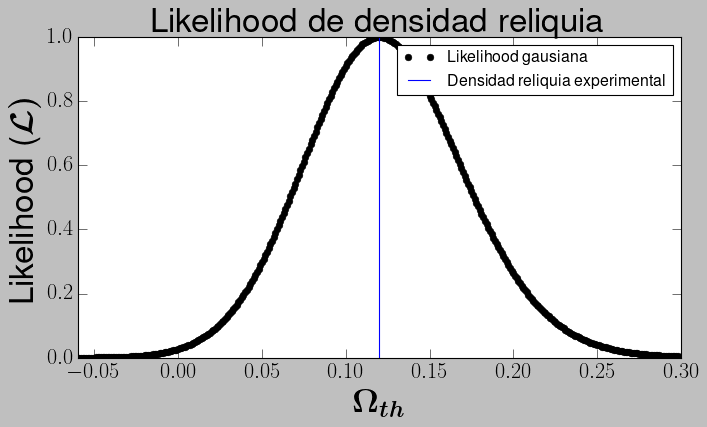

In [21]:
plt.figure(figsize=(9.0,5.5))
plt.plot(x_omega,y_omega,'ko',label='Likelihood gausiana', markeredgecolor='black')
plt.title(r'Likelihood de densidad reliquia',size=30)
plt.axvline(0.12,label='Densidad reliquia experimental')
plt.xlabel(r'$\boldsymbol{\Omega_{th}}$',size=30)
plt.ylabel(r'Likelihood ($\boldsymbol{\mathcal{L})}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-0.06,0.30)
plt.legend()
plt.tight_layout()

### Likelihood para la detección directa:

La detección directa consiste en calcular la sección transversal independiente de espín $\sigma^{SI}$, ahora, la likelihood para la detección directa se puede construir a partir de considerar una gaussiana centrada en el origen, o sea $\sigma_{obs}^{SI} = 0 $. 


$$ \mathcal{L}_{\sigma^{SI}} = exp \left( -\frac{1}{2}\left(\frac{\sigma^{SI}_{Th} - \sigma^{SI}_{obs}}{\Sigma_{DD}}\right)^{2} \right) $$

Es posible construir un $\Sigma_{obs}^{DM}$ a partir de los datos generados por el experimento LZ \cite{refprofesor}. Para esto es necesario exportar los datos y construir una función $f_{DD}(M)$ y usarla para calcular el valor del error observable de la forma: 

$$ \Sigma_{obs}^{DD} (M) = f_{DD}(M) / 1.64 $$

Además se debe asumir un error teórico correspondiente a las correcciones cuánticas, la variación de la renormalización y modificaciones de las ecuaciones de estados QCD. Esto se realiza a partir de: 

$$ \Sigma_{th}^{DD} = 0.2 \sigma_{th}^{SI} $$

Y por tanto podemos expresar el sigma total a partir de: 

$$ \Sigma_{DD} = \sqrt{(\Sigma_{th}^{DD})^{2} + (\Sigma_{obs}^{DD})^{2}} $$

In [22]:
from scipy.interpolate import interp1d
LZ22 = np.loadtxt('Lz_experiment.txt')
fLZ22 = interp1d(LZ22[:,0],LZ22[:,2]*1e36)

def gaussian_sigma(M,csection_):
    m_ = M
    cxSI_th = csection_
    cxSI_ex = 0.0 
    delta_cxSI_th = 0.2*cxSI_th
    delta_cxSI_ex = fLZ22(m_)/1.64
    delta_cxSI = (delta_cxSI_th**2 + delta_cxSI_ex**2)**0.5
    return np.exp(-(1/2)*(cxSI_th - cxSI_ex)**2 / delta_cxSI**2)

In [23]:
x_csection = np.arange(-1e-10,1e-10,1e-12)
y_csection1 = gaussian_sigma(100,x_csection)
y_csection2 = gaussian_sigma(62.5,x_csection)
y_csection3 = gaussian_sigma(20,x_csection)
y_csection4 = gaussian_sigma(200,x_csection)
y_csection5 = gaussian_sigma(1e3,x_csection)

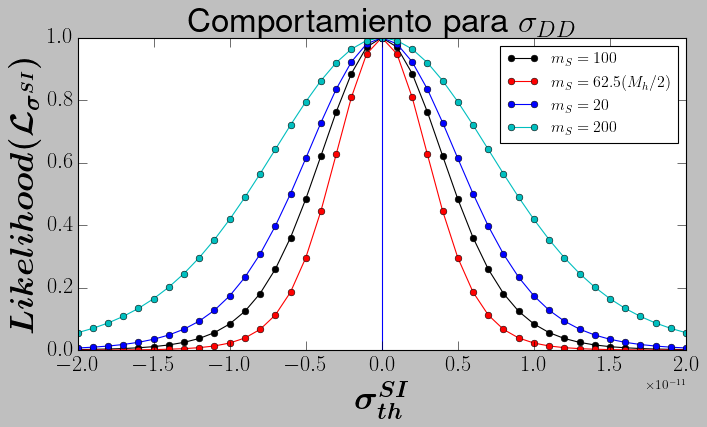

In [24]:
plt.figure(figsize=(9.0,5.5))
plt.plot(x_csection,y_csection1,'ko-',label='$m_{S} = 100$', markeredgecolor='black')
plt.plot(x_csection,y_csection2,'ro-',label='$m_{S} = 62.5 (M_{h}/2)$', markeredgecolor='black')
plt.plot(x_csection,y_csection3,'bo-',label='$m_{S} = 20$', markeredgecolor='black')
plt.plot(x_csection,y_csection4,'co-',label='$m_{S} = 200$', markeredgecolor='black')
#plt.plot(x_csection,y_csection5,'mo-',label='Likelihood gausiana M = 1000', markeredgecolor='black')
plt.axvline(0.0)
plt.title(r'Comportamiento para $\sigma_{DD}$',size=30)
#plt.axvline(0.12,label='Densidad reliquia experimental')
plt.xlabel(r'$\boldsymbol{\sigma^{SI}_{th}}$',size=30)
plt.ylabel(r'$\boldsymbol{Likelihood (\mathcal{L}_{\sigma^{SI}})}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-2e-11,2e-11)
plt.legend()
plt.tight_layout()

Debido a que la sección transversal depende de la masa, en el gráfico anterior se muestran varias líneas correspondientes a diferentes valores de masa, que se consideran importantes a la hora del estudio en la materia oscura.

## Teorema de Milk's 

Teniendo construido el likelihood total con las señales, es necesario usar el teorema de Milk's para construir su valor de $\chi^{2}$. Este teorema nos dice que: $\chi^{2} = -2 Ln \mathcal{L}$. 

De forma general se tiene la ecuación.

$$ 
\chi^{2}_{obs} = \sum_{i=1}^{N}
 \chi^{2}_{i}(\mathcal{O}_{Th}^{i}) = \sum_{i=1}^{N} \left( \frac{\mu_{th}^{i} - \mu_{obs}^{i}}{\Sigma^{i}} \right)^{2} \text{,} \nonumber
\quad 
\Sigma_{i} = \sqrt{(\Sigma_{th}^{i})^{2} + (\Sigma_{obs}^{i})^{2}}
$$

Pero en especifico para este problema se posee que: 

$$\chi^{2} = \left(\frac{\Omega_{Th} - \Omega_{obs}}{\Sigma_{\Omega h^{2}}}\right)^{2} + \left(\frac{\sigma^{SI}_{Th} - \sigma^{SI}_{obs}}{\Sigma_{DD}}\right)^{2} $$

In [25]:
# Color style for output sample points
de_pts = "#91bfdb" # Diver scan
rn_pts = "#fc8d59" # Random scan
gd_pts = "#ffffbf" # Grid scan

## Bounds o ligaduras.

Es necesario establecer unos valores límites o ligaduras. 
Dependiendo del analisis que cada uno desee llevar, las ligaduras se trabajan en escala lineal o logaritmica. 
Si deseamos realizar un analisis global de los parámetros normalmente para generar buenos resultados es conveniente usar la escala logaritmica. Mientras que, para realizar analisis detallados de zonas como lo pueden ser zonas de resonancia es común usar la escala lineal.

In [26]:
'''
lash_min = 0
lash_max = 1
mass_min = 10
mass_max = 200
'''
lash_min = -4
lash_max = 0
mass_min = 1
mass_max = 3

Las siguientes rutinas corresponden al codigo generado para la optención de los valores por medio de micrOmegas, estas rutinas lo unico que se encargan es de ejecutar micrOmegas para calcular los respectivos valores de densidad reliquia $\Omega h^{2}$ y $\sigma^{SI}_{DD}$.

La función calc(x_) retornará un vector con los datos arrojados por el programa de micrOmegas, este vector esta compuesto por los valores de $\Omega h^{2}$ y $\sigma^{SI}_{DD}$.

In [27]:
def writer(file,dictionary):
    data1=open(file,'w')
    for items in dictionary.items(): 
        data1.write("%s %s\n"%items)
    data1.close()

def eje(COMMAND): 
    const = 0.0 
    dato = subprocess.getoutput(COMMAND)
    if(len(dato)>0):
        const = float(dato)
    else: 
        const = -1 
    return const

def calc(x_): 
    ruta = 'data.dat'
    rutaG = './main data.dat >temporal.dat'
    COMMAND_RQ = "grep 'Omega' temporal.dat | awk 'BEGIN{FS=\"=\"};{print $3}'"
    COMMAND_CS = "grep 'proton  SI' temporal.dat | awk '{print $3}'"
    data = {'Q':14, 'Mh':120,'laS':0.1,'laSH':0.15,'Mdm1':700}
    data['laSH'] = 10**x_[0]
    data['Mdm1'] = 10**x_[1]
    #print(x_)
    #data['laSH'] = x_[0]
    #data['Mdm1'] = x_[1]
    writer(ruta,data) 
    subprocess.getoutput(rutaG)
    datos = [0]*2
    datos[0] = eje(COMMAND_RQ) #ejecutar el comando desde la terminal 
    datos[1] = eje(COMMAND_CS)
    return datos

Se construyen dos funciones l_omega y l_csection, esto usando el teorema de Milk's y las funciones gaussianas, como se explico anteriormente. 

Ambas funciones  recibe 2 parámetros, un vector x_ el cual lleva la información de los parámetros de estudio en el modelo, y el valor teorico calculado, el cual corresponde al hallado por micrOmegas. 

Luego la función gaussian(x_) se encarga de ejecutar calc(x_) la cual permite determinar los valores teoricos de los observables y por otro lado, retorna una likelihood compuesta por las dos funciones creadas en este apartado para así desarrollar un valor de chi cuadrado.

In [28]:
def l_omega(x_,omega_th_): 
    #lash_ = x_[0]
    #m_ = x_[1]
    lash_ = 10**x_[0]
    m_ = 10**x_[1]
    omega_th = omega_th_
    omega_ex = 0.12
    delta_omega_pdg = ((0.1*omega_th)**2 + 0.001*2)**0.5
    return (omega_th - omega_ex)**2 / delta_omega_pdg**2

def l_csection(x_,csection_):
    #lash_ = x_[0]
    #m_ = x_[1]
    lash_ = 10**x_[0]
    m_ = 10**x_[1]
    cxSI_th = csection_
    cxSI_ex = 0.0 
    delta_cxSI_th = 0.2*cxSI_th
    delta_cxSI_ex = fLZ22(m_)/1.64
    delta_cxSI = (delta_cxSI_th**2 + delta_cxSI_ex**2)**0.5
    return (cxSI_th - cxSI_ex)**2 / delta_cxSI**2

def gaussian(x_):
    datos = calc(x_)
    #print("El valor de la likelihood rq es:", l_csection(x_,datos[1]))
    #print("El valor de la likelihood cs es:",l_omega(x_,datos[0]))
    return l_omega(x_,datos[0]) + l_csection(x_,datos[1])

Como se realiza en el codigo para la función de Rosenbrock, se usa de_scan para estudiar el espacio de parámetros; es de tener presente que en esta función debemos establecer las bounds o ligaduras, entre más cantidad de rangos (min,max) ingresemos al differential evolution este calculará más valores. Por ejemplo, para este caso, bounds esta compuesto unicamente por dos rangos, (lash_min, lash_max) y (mass_min, mass_max), estos rangos nos indica que unicamente estaremos estudiando o será de nuestro interés dos parámetros, la masa de la materia oscura y la constante de acoplamiento con el boson de Higgs. 

La rutina objective(x_) unicamente se encarga de almacenar los valores calculados por el algoritmo de micrOmegas, ademas de retornar un valor correspondiente al chi_sq_ este equivale al valor de chi cuadrado determinado por la likelihood, es importante que a la hora de trabajar con el algoritmo genético siempre retornemos un valor, esto ya que, con este mismo el algoritmo se encarga de converger a una solución adecuada.

Por otro lado, es necesario estudiar a fondo las diferentes strategy para poder determinar de manera más eficiente el espacio de parámetros. Se recomienda no quedarse con el uso de una sola estrategia, esto ya que es posible generar una amplia gama de datos con las otras, generando así un espacio de parámetros más completo. 

Con respecto a la popsize, entre mayor sea la población más tiempo tendremos en funcionamiento el algoritmo y mejores soluciones se tendrán, pero, debido a las pruebas, normalmente una población excesivamente grande, tiende a ser menos optima en el calculo y hace que las soluciones se repitan, por tanto, usar poblaciones superiores a 200 es innecesario y es mejor utilizar calculos de población entre los 50 y los 200, normalmente se usa 100. Depende mucho del tipo de problema que se posea. 

Ademas, no se suelen modificar las otras variables a excepción de seed y es que esta permite que la información generada por el algoritmo sea replicable, a su vez, con diferentes semillas es posible generar diferentes puntos del espacio de parámetros, por lo que, también se vuelve necesario su modificación.


### Nota: 
La función de_scan recibe una variable llamada nombre_, esta variable corresponde a string el cual debe ser el nombre junto con su extensión, se usa para almacenar los datos generados por el algoritmo. Por defecto el nombre_ es 'datos.csv', ademas, la extensión del archivo siempre debe finalizar en .csv para evitar conflictos a la hora de almacenar los datos. 

Ademas, de_scan retorna un array, el cual contiene todo los datos generados por DE. 

In [29]:
def de_scan(nombre_ = 'datos.csv'):
    x = [] 
    chi_sq = [] 
    bounds = [(lash_min,lash_max),(mass_min,mass_max)]
    
    def objective(x_): 
        arreglo = [0]*3
        chi_sq_ = gaussian(x_)
        chi_sq.append(chi_sq_)
        datos = calc(x_)
        arreglo[0:1] = x_
        arreglo[2:3] = datos
        arreglo[4] = chi_sq_ 
        x.append(arreglo) 
        #print(arreglo)
        if (len(x)%1000 == 0): 
            print(len(x),end='\r')
        return chi_sq_
    
    differential_evolution(objective, bounds,
                           strategy='rand1bin', maxiter=None,
                           popsize=200, tol=0.01, mutation=(0.7, 1.99999), recombination=0.15,
                           polish=False, seed=seed)

    try: 
        column_names = ['laSH','mass','reliq','cross_section','chi']
        df = pd.DataFrame(np.array(x),columns = column_names)
        print("Los elementos del dataframe son:")
        #df_almacenado = filter(df)
        df.to_csv('datos.csv', index=False, header=None)
        print(df.head())
        print("El tamaño de los datos es:",len(df))
        print("Datos almacenados con exito")
    except:
        print("Los datos del dataframe no han podido ser almacenados")

    return np.array(x),len(x)

## Ejecutar. 
Normalmente el algoritmo se ejecuta a partir del siguiente codigo.

Primero establecemos un valor fijo de la semilla en 16, para luego a partir de este generar un valor aleatorio de la misma. 

Tenemos un tiempo inicial. 

Un llamado a la función que vamos a usar, en este caso de_scan. 

Esta función posee un sistema que te va mostrando alrededor de cuantos datos ha generado el algoritmo genético. 

Tenemos un tiempo final. 

Y un print en pantalla para mostrar la cantidad de tiempo que se demoro el archivo en correr. 

Ademas de información relevante de la cantidad de puntos generados por el algoritmo y guardos en el archivo cuyo nombre fue colocado a la función de_scan(nombre)

### Nota: 
Es necesario dejar claro que ejecutar este codigo desde el notebook puede llevar a que la generación de la información sea aun más lenta, almenos ejecutado desde jupyter notebook. Por tanto, se recomienda crear un archivo de texto con terminación .py y ejecutar el algoritmo para generar los datos. 

In [30]:
'''
seed = 16
np.random.seed(seed) 
print("Running de_scan") 
tO = time.time()
x,call = de_scan('datos.csv')
de_time = time.time() - tO 
de_time = de_time/60
print("Tiempo de ejecución: ", de_time, " minutos")
#print("Cantidad de datos generados: ", call)
print("Finalizado")
'''
print("")

Aquí lo que haremos será importar los datos desde un archivo, generados por el mismo codigo usado aquí.

In [31]:
url = "almacenamiento/datos.csv"
columnas = ['loglaSH','logmS','omegaS','sigmaSI','loglike']
### loglike means: -2log(L)
df = pd.read_csv(url,names=columnas)
df['mS'] = 10**df.logmS
df['laSH'] = 10**df.loglaSH
df['like'] = np.exp(-df.loglike/2)
df.head()

,loglaSH,logmS,omegaS,sigmaSI,loglike,mS,laSH,like
0,-1.312101,1.634656,303.00,5.081000e-05,36.476340,43.117705,0.048742,1.200227e-08
1,-3.302266,2.883779,3500.00,1.759000e-11,99.993142,765.207421,0.000499,1.935375e-22
2,-3.449902,2.584942,1690.00,3.520000e-14,99.985799,384.540020,0.000355,1.942493e-22
3,-1.847119,2.920082,7.56,1.211000e-08,96.690677,831.920234,0.014219,1.008989e-21
4,-1.478663,2.521889,242.00,4.118000e-07,30.263911,332.574346,0.033215,2.680867e-07


Estos datos fueron generados en escalar logaritmica, por lo que es necesario convertirlos, como se puede ver en el codigo.

In [32]:
print("Cantidad de puntos generados")
print(df.shape)

Cantidad de puntos generados
(54900, 8)


In [33]:
Lmax = min(df['loglike'])
print("El valor minímo de loglike es:",Lmax)
print("El valor minímo de loglike nos indicar el mejor punto del conjunto de datos")

El valor minímo de loglike es: 0.0014057556983642
El valor minímo de loglike nos indicar el mejor punto del conjunto de datos


In [34]:
#Generando mascaras como un filtro alrededor de los datos que de verdad son de nuestro interes. 
ydata1 = df[(df['loglike'] - Lmax) < 5.99] ##2σ
ydata2 = df[(df['loglike'] - Lmax) < 2.30] ##1σ 

In [35]:
print(ydata1.shape)
print(ydata2.shape)

(25578, 8)
(22799, 8)


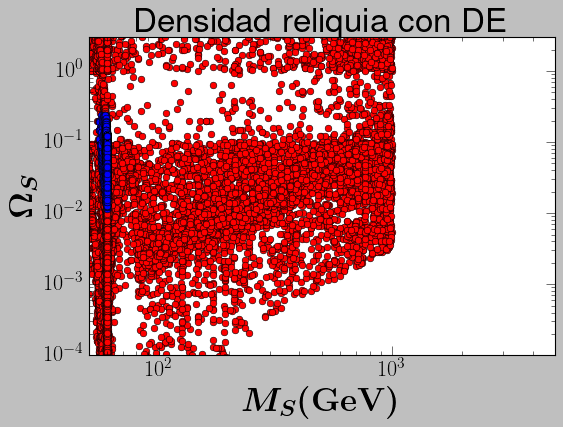

In [36]:
plt.figure(figsize=(7.2,5.5))
plt.plot(df['mS'],df['omegaS'],'ro',label='$\phi_1$', markeredgecolor='black')
plt.plot(ydata1['mS'],ydata1['omegaS'],'bo',label='$\phi_1$', markeredgecolor='black')
plt.title(r'Densidad reliquia con DE',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\Omega_S}$',size=30)
plt.xlim(50,5000)
plt.ylim(1e-4,3e0)
plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

Actualmenete estos son los valores usandos alrededor del modelo Z2 para estudiar el espacio de parámetros, es necesario realizar un analisis más detallado del modelo Z2 para estudiar el espacio de parámetros.

# Modelo Z3

Cuando se avanza en el estudio de los diferentes modelos de materia oscura, existen modelos que se encuentran cargados de muchas características físicas pero a la hora de su estudio se vuelven muy complejos para los límites del proyecto. Por esto, el modelo $Z_{3}$ se vuelve un modelo de interés particular para la materia oscura escalar; usa las bases del modelo tratado en la sección 3.1, añadiendo a este una materia oscura compleja y además, un término de potencial que permite la creación de nuevos canales donde, a partir de procesos 2 a 2, se poseen 2 partículas de materia oscura que se aniquilan y se genera una partícula de materia oscura y una partícula del modelo estándar, a esto se le conoce como proceso de semi aniquilación. 

## Lagrangiano del modelo Z3

El modelo $Z_{3}$ parte del lagrangiano propuesto para el modelo $Z_{2}$ pero ahora la materia oscura toma un rol diferente. En el modelo anterior se consideraba un campo real, mientras que en este ya consideramos un campo complejo $S$ y $S^{*}$, siendo $S$ una partícula de materia oscura y $S^{*}$ su antipartícula. 

Debido a la presencia de dos campos, es preciso hacer algunas modificaciones al lagrangiano, además de agregar un nuevo término, esto incluiría un nuevo diagrama de Feynman de semi aniquilación. Con base a lo anterior el lagrangiano toma la forma\cite{modeloz3}: 

$$
    \mathcal{L} = \mathcal{L}_{SM} + \frac{1}{2} \partial_{\mu} S \partial^{\mu} S^{*} + \frac{\mu_{s}}{2}|S|^{2} + \frac{\lambda_{s}}{4} |S|^{4} + \frac{1}{2}\lambda_{SH} |S|^{2} |H|^{2} + \frac{\mu_{3}}{2} (S^{3} + S^{\dagger 3})
$$

Al usar el mecanismo de Higgs, usado también para el modelo $Z_{2}$ es posible observar como, el rompimiento de la simetría hace que la masa de la materia oscura no dependa del nuevo parámetro y tome la misma forma que en el modelo anterior. Esto hace posible identificar que, el considerar este nuevo término $S^{3}$ el cual solo depende del campo $S$, no modifica las características másicas del modelo pero sí, añade un nuevo canal de semianiquilación por lo que debería influir en la densidad reliquia.  Se establece entonces que: 

$$
\mu_{H}^{2} = -\frac{M_{h}^{2}}{2}\text{,} 
\quad  \lambda_{H} = \frac{1}{2} \frac{M_{h}^{2}}{\nu^{2}}\text{,}
\quad  \mu_{S}^{2} = M_{S}^{2} - \lambda_{SH} \frac{\nu^{2}}{2}
$$

Usando $M_{S}$ para representar la masa oscura 'vacía', $\lambda_{SH}$ para denotar la constante de acoplamiento entre la materia oscura y el Higgs, $\mu_{3}$ como el acoplamiento cúbico del singlete, y $\lambda_{S}$ como el acoplamiento cuártico del singlete, todos estos parámetros se consideran como variables libres.

Como es habitual en las teorías cuánticas al estudiar potenciales, suele ser necesario definir los límites del modelo para aplicar un enfoque perturbativo. En el artículo \cite{article15}, se lleva a cabo dicho análisis y se establece que los límites son $|\lambda_S| < \pi$ y $|\lambda_{SH}| < 4\pi$. Además, para asegurar la estabilidad del vacío y obtener un potencial finito y acotado, se proponen los siguientes límites para los parámetros: 

$$
\lambda_{H} > 0 \text{, }  \lambda_{S} > 0 \text{, } \lambda_{SH} + 2 \sqrt{\lambda_{H}\lambda_{S}} > 0 
$$


## Ancho invisible del Higgs

Como bien sabemos, en los dos modelos, $Z_{2}$ y $Z_{3}$, se está tratando procesos que añaden nuevos canales de decaimientos a los ya considerados en el modelo estándar.

Esto hace que sea posible que, para los campos de Higgs creados en los colisionadores de hadrones, presenten decaimientos en partículas ''invisibles'', o sea, que no son detectadas. A esto se le conoce como ancho invisible de Higgs o ''Higgs invisible width''. 
Esta ancho está determinado por la ecuación: 

$$
\Gamma_{h \rightarrow SS*}^{Z_{3}}  = \frac{\lambda_{SH} ^{2} \nu^2} {16 \pi M_{h}} \sqrt{1 - \frac{4M_{s}^{2}} {M_{h}^{2}}}
$$

Este ancho solo es posible cuando $M_{S} \leq M_{h}/2$. 

En el modelo estándar  este ancho calculado está en $\Gamma_{H} ^{SM} = 4.07 \times 10^{-3}$ GeV \cite{articulo93}, debido a esto, el branching ratio de la escala invisible ($BR_{inv} = \Gamma_{H \rightarrow SS*}^{Z_{3}} / \Gamma_{H}^{SM}$) está limitado a ser alrededor de $0.24$ cuando consideramos un nivel de confianza del $95\%$ \cite{article94_z3,article95_z3} por las mediciones directas reportadas y aproximadamente 0.17 por ajustes estadísticos de los acoplamientos presentes en el bosón de Higgs \cite{articulo96,articulo97}. 

## Relic density

Como ya se mencionó anteriormente, la densidad reliquia reportada por Planck está fijada alrededor de $0.12$, debido a esto siempre es pertinente tener en cuenta este valor y calcular la densidad reliquia para cada uno de los modelos propuestos. Debemos tener presente que, en estos modelos se trata una materia oscura térmica y que, al añadir a la misma un nuevo canal de semi aniquilación, esto afectará en su densidad reliquia. Esto lleva a que se obtenga una ecuación con la forma \cite{article69_z3}: 

$$
\frac{d n }{dt}  + 3Hn  = - <v\sigma^{S S^{*} \rightarrow X X}> (n^{2} - \bar{n}^2) - \frac{1}{2} <v\sigma^{S S^{*
}\rightarrow S H}> (n^{2} - n \bar{n})
$$

donde $X$ es cualquier partícula del modelo estándar. En la ecuación anterior, podemos ver como, la densidad se ve modificada por el proceso de semi aniquilación, pero solo existe un canal válido para este proceso, el cual está descrito por $S + S \rightarrow S^{*} + H$, este surge por el intercambio de |S| en los tres tipos de canales existentes $s$, $t$ y $u$.


## Algoritmo para el modelo Z3.

Es posible construir en sus totalidad el espacio de parámetros a partir de considerar unicamente una función en el likelihood, esta es $\mathcal{L}_{Th}$

In [37]:
namesDD_1=['index','loglaSH','logmS','logmu3','sigmaSI','loglike']
DE_dataDD_1 = pd.read_csv('almacenamiento/archivo_profile.csv',names=namesDD_1)
DE_dataDD_2 = pd.read_csv('almacenamiento/archivo_profile_1.csv',names=namesDD_1)
DE_dataDD_3 = pd.read_csv('almacenamiento/archivo_profile_2.csv',names=namesDD_1)
DE_dataDD_4 = pd.read_csv('almacenamiento/archivo_profile_rand1bin.csv',names=namesDD_1)
DE_dataDD_5 = pd.read_csv('almacenamiento/archivo_profile_randtobest1exp.csv',names=namesDD_1)
zdata1 = pd.concat([DE_dataDD_1, DE_dataDD_2,DE_dataDD_3,DE_dataDD_4,DE_dataDD_5])
zdata1['mS'] = 10**zdata1.logmS
zdata1['laSH'] = 10**zdata1.loglaSH
zdata1['mu3'] = 10**zdata1.logmu3
zdata1['like'] = np.exp(-zdata1.loglike/2)
zdata1 = zdata1.drop(['index'],axis=1)
zdata1.head()

,loglaSH,logmS,logmu3,sigmaSI,loglike,mS,laSH,mu3,like
0,-0.326063,1.349943,2.482786,3.610000e-06,1.729018,22.384291,0.471995,303.938377,0.421258
1,-0.091324,3.287756,1.866556,1.537000e-09,0.483842,1939.796305,0.810357,73.545454,0.785118
2,-0.283438,0.853388,0.678643,3.666000e-05,3.564332,7.134898,0.520670,4.771366,0.168273
3,-0.335402,3.054843,2.497645,1.459000e-09,1.085512,1134.601052,0.461953,314.517978,0.581144
4,-0.306862,1.257302,2.864059,5.928000e-06,1.729040,18.084333,0.493331,731.238557,0.421254


In [38]:
zdata1 = zdata1[zdata1.duplicated()]
print("Cantidad de puntos generados")
print(zdata1.shape)

Cantidad de puntos generados
(124663, 9)


In [39]:
Lmax = min(zdata1['loglike'])
print("El valor minímo de loglike es:",Lmax)

El valor minímo de loglike es: 6.6928760999999976e-21


In [40]:
zdata2 = zdata1[(zdata1.loglike - Lmax)<5.99] ##2σ
zdata3 = zdata1[(zdata1.loglike - Lmax)<2.30] ##1σ
print("Elementos a 2σ")
print(zdata2.shape)
print("Elementos a 1σ")
print(zdata3.shape)

Elementos a 2σ
(124663, 9)
Elementos a 1σ
(117812, 9)


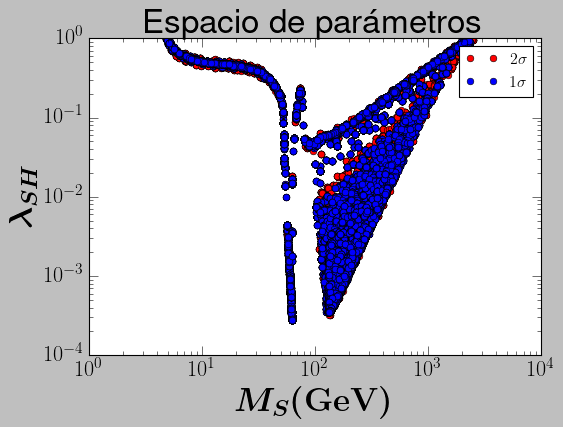

In [41]:
plt.figure(figsize=(7.2,5.5))
#plt.plot(zdata2['mS'],zdata2['omegaS'],'ro',label='sin filtrar', markeredgecolor='black')
plt.plot(zdata2['mS'],zdata2['laSH'],'ro',label='$2\sigma$', markeredgecolor='black')
plt.plot(zdata3['mS'],zdata3['laSH'],'bo',label='$1\sigma$', markeredgecolor='black')
plt.title(r'Espacio de parámetros',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\lambda_{SH}}$',size=30)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

El siguiente conjunto de elementos esta construido a partir de usar un dos likelihood, el de densidad reliquia y el de cross section.

In [42]:
namesDD_1=['loglaSH','logmS','logmu3','omegaS','sigmaSI','loglike']
namesDD_2=['logmS','loglaSH','logmu3','omegaS','sigmaSI','loglike']
element = np.loadtxt('almacenamiento/all-DE-results-singlet-DD.txt')
DE_dataDD_1 = pd.DataFrame(element,columns=namesDD_2)
DE_dataDD_1 = DE_dataDD_1[['loglaSH','logmS','logmu3','omegaS','sigmaSI','loglike']]
DE_dataDD_2 = pd.read_csv('almacenamiento/total_data.csv',names=namesDD_1)
ydata1 = pd.concat([DE_dataDD_1, DE_dataDD_2])

ydata1['mS'] = 10**ydata1.logmS
ydata1['laSH'] = 10**ydata1.loglaSH
ydata1['mu3'] = 10**ydata1.logmu3
ydata1['like'] = np.exp(-ydata1.loglike/2)
ydata1.head()

,loglaSH,logmS,logmu3,omegaS,sigmaSI,loglike,mS,laSH,mu3,like
0,0.471635,3.709488,3.540548,0.0699,2.956051e-09,3.337523e+01,5122.573911,2.962344,3471.742614,5.657985e-08
1,-1.112643,2.763688,2.789867,0.8650,1.557797e-10,5.552666e+03,580.347359,0.077154,616.405645,0.000000e+00
2,-2.476985,2.787305,2.949311,326.0000,2.610159e-13,1.061978e+09,612.780623,0.003334,889.838923,0.000000e+00
3,-3.549151,2.595152,3.518180,652.0000,4.527985e-15,4.249475e+09,393.687519,0.000282,3297.460757,0.000000e+00
4,-2.271541,3.894180,3.022396,26800.0000,4.121268e-15,7.182336e+12,7837.544437,0.005351,1052.921006,0.000000e+00


In [43]:
print("Cantidad de puntos generados")
print(ydata1.shape)

Cantidad de puntos generados
(1051050, 10)


In [44]:
print(max(ydata1['like']))
print(max(ydata1['loglike']))
print(min(ydata1['like']))
print(min(ydata1['loglike']))

0.9999958143539828
3.0913599866560004e+19
0.0
8.371309554248857e-06


El valor maximo de like es casi 1 y el valor minimo de chi es casi cero, por tanto esto hace que la normalización no sea tan significativa, pero siempre es necesario realizarla.

Calculo del valor maximo.

In [45]:
Lmax = min(ydata1['loglike'])
print("El valor minímo de loglike es:",Lmax)

El valor minímo de loglike es: 8.371309554248857e-06


In [46]:
ydata2 = ydata1[(ydata1.loglike - Lmax)<5.99] ##2σ
ydata3 = ydata1[(ydata1.loglike - Lmax)<2.30] ##1σ
print("Elementos a 2 $\sigma$")
print(ydata2.shape)
print("Elementos a 1 $\sigma$")
print(ydata3.shape)

Elementos a 2 $\sigma$
(143275, 10)
Elementos a 1 $\sigma$
(93336, 10)


In [47]:
#Es necesario eliminar valores que se repitan en el archivo
#para ello se ejecuta. 
ydata2 = ydata2[ydata2.duplicated()]
ydata3 = ydata3[ydata3.duplicated()]
print("Elementos a 2 $\sigma$")
print(ydata2.shape)
print("Elementos a 1 $\sigma$")
print(ydata3.shape)
print("Se eliminan los elementos duplicatos del dataframe")

Elementos a 2 $\sigma$
(113498, 10)
Elementos a 1 $\sigma$
(75384, 10)
Se eliminan los elementos duplicatos del dataframe


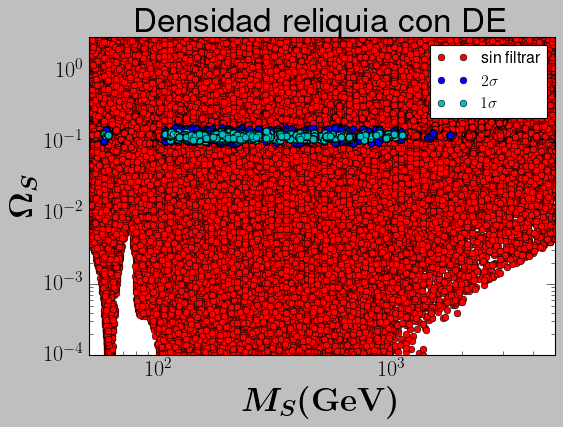

In [48]:
plt.figure(figsize=(7.2,5.5))
plt.plot(ydata1['mS'],ydata1['omegaS'],'ro',label='sin filtrar', markeredgecolor='black')
plt.plot(ydata2['mS'],ydata2['omegaS'],'bo',label='$2\sigma$', markeredgecolor='black')
plt.plot(ydata3['mS'],ydata3['omegaS'],'co',label='$1\sigma$', markeredgecolor='black')
plt.title(r'Densidad reliquia con DE',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\Omega_S}$',size=30)
plt.xlim(50,5000)
plt.ylim(1e-4,3e0)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

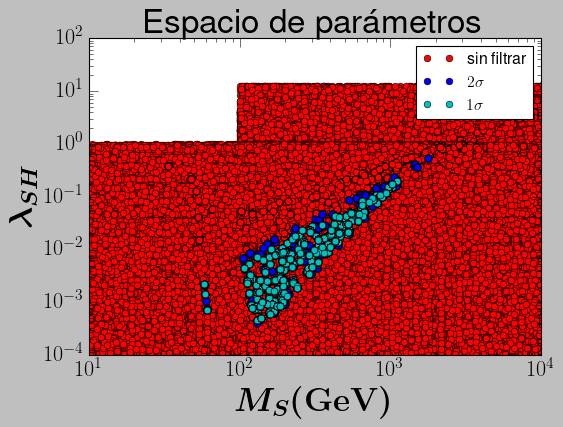

In [49]:
plt.figure(figsize=(7.2,5.5))
plt.plot(ydata1['mS'],ydata1['laSH'],'ro',label='sin filtrar', markeredgecolor='black')
plt.plot(ydata2['mS'],ydata2['laSH'],'bo',label='$2\sigma$', markeredgecolor='black')
plt.plot(ydata3['mS'],ydata3['laSH'],'co',label='$1\sigma$', markeredgecolor='black')
plt.title(r'Espacio de parámetros',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\lambda_{SH}}$',size=30)
#plt.xlim(50,5000)
#plt.ylim(1e-4,3e0)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()